# Predicting GDP of Itlay based on various sectors

In [1]:
import wbdata
import pandas as pd
import pycountry
import wbdata
import datetime
import matplotlib.pyplot as plt

 
#Selecting country from world bank data
countries = ["ITA"]

#Gathering data of various sector for the country
indicators1 = { 
               'BX.KLT.DINV.WD.GD.ZS': 'FDI net inflows', 
               'BM.KLT.DINV.WD.GD.ZS':'FDI net outflows', 
              'SH.XPD.GHED.GD.ZS': 'Domestic health expenditure',
              'GC.XPN.TOTL.GD.ZS': 'Expense on Goods & Services',
              'NE.CON.TOTL.ZS': 'Final consumption expenditure',
                'NV.AGR.TOTL.ZS' : 'Agriculture,forestry,fishing',
           'GB.XPD.RSDV.GD.ZS' : 'Research and development expenditure'
              }

#Indicating the time frame(years)
data_date = (datetime.datetime(1970, 1, 1), datetime.datetime(2015, 1, 1))
 
#Getting a dataframe with all the data 
df1 = wbdata.get_dataframe(indicators1, country=countries, data_date=data_date ,convert_date=False)


***Foreign direct investment are the net inflows of investment to acquire a lasting management interest (10 percent or more of voting stock) in an enterprise operating in an economy other than that of the investor.***

***Foreign direct investment refers to direct investment equity flows in an economy. It is the sum of equity capital, reinvestment of earnings, and other capita.***

***Domestic general government health expenditure (% of GDP) refers to public expenditure on health from domestic sources as a share of the economy as measured by GDP
World Health Organization Global Health Expenditure database (http://apps.who.int/nha/database).***

***Expense is cash payments for operating activities of the government in providing goods and services. It includes compensation of employees (such as wages and salaries), interest and subsidies, grants, social benefits, and other expenses such as rent and dividends.***

***Final consumption expenditure (formerly total consumption) is the sum of household final consumption expenditure (private consumption) and general government final consumption expenditure (general government consumption).***

***Agriculture corresponds to ISIC divisions 1-5 and includes forestry, hunting, and fishing, as well as cultivation of crops and livestock production. Value added is the net output of a sector after adding up all outputs and subtracting intermediate inputs***

***Gross domestic expenditures on research and development (R&D), expressed as a percent of GDP. They include both capital and current expenditures in the four main sectors: Business enterprise, Government, Higher education and Private non-profit. R&D covers basic research, applied research, and experimental development.***

In [2]:
#Inserting the country code
df1.insert(0, "Country code","ITA")
df1

,Country code,FDI net inflows,FDI net outflows,Domestic health expenditure,Expense on Goods & Services,Final consumption expenditure,"Agriculture,forestry,fishing",Research and development expenditure
date,,,,,,,,
2015,ITA,0.724628,0.857353,6.704375,42.268939,79.878950,2.065237,1.34115
2014,ITA,0.788869,0.948355,6.816756,42.223094,80.145263,1.997861,1.34301
2013,ITA,0.912122,0.946879,6.808803,42.218227,80.708699,2.144590,1.30768
2012,ITA,0.001672,0.325659,6.818533,41.897088,81.106722,1.970753,1.27087
2011,ITA,1.503735,2.263215,6.803757,40.631426,80.932501,1.883426,1.20984
2010,ITA,0.465343,1.439908,7.024430,41.358252,81.278287,1.775515,1.22311
2009,ITA,0.757890,0.838300,7.029088,42.850498,81.111689,1.802739,1.22126
2008,ITA,-0.396088,2.822331,6.650427,39.075242,78.988812,1.874624,1.16367
2007,ITA,2.984923,5.428844,6.325243,38.100188,78.093332,1.896287,1.13270


In [3]:
df1.reset_index(inplace = True)

#### Performing Exploratory Data Analysis on the data to elimate the NaN values

In [4]:
df1['Research and development expenditure']= df1['Research and development expenditure'].interpolate(method = 'polynomial', order = 2)
df1['Research and development expenditure'] = df1['Research and development expenditure'].interpolate(method = 'pad')
df1['Domestic health expenditure'] = df1['Domestic health expenditure'].interpolate(method = 'pad')
df1['Agriculture,forestry,fishing'] = df1['Agriculture,forestry,fishing'].interpolate(method = 'pad')
df1['Expense on Goods & Services'] = df1['Expense on Goods & Services'].interpolate(method = 'pad')
df1

,date,Country code,FDI net inflows,FDI net outflows,Domestic health expenditure,Expense on Goods & Services,Final consumption expenditure,"Agriculture,forestry,fishing",Research and development expenditure
0,2015,ITA,0.724628,0.857353,6.704375,42.268939,79.878950,2.065237,1.34115
1,2014,ITA,0.788869,0.948355,6.816756,42.223094,80.145263,1.997861,1.34301
2,2013,ITA,0.912122,0.946879,6.808803,42.218227,80.708699,2.144590,1.30768
3,2012,ITA,0.001672,0.325659,6.818533,41.897088,81.106722,1.970753,1.27087
4,2011,ITA,1.503735,2.263215,6.803757,40.631426,80.932501,1.883426,1.20984
5,2010,ITA,0.465343,1.439908,7.024430,41.358252,81.278287,1.775515,1.22311
6,2009,ITA,0.757890,0.838300,7.029088,42.850498,81.111689,1.802739,1.22126
7,2008,ITA,-0.396088,2.822331,6.650427,39.075242,78.988812,1.874624,1.16367
8,2007,ITA,2.984923,5.428844,6.325243,38.100188,78.093332,1.896287,1.13270
9,2006,ITA,2.925967,3.026869,6.577446,38.577645,78.863587,1.945840,1.08696


### Collect GDP after two years data from world bank and merge it with the above dataframe

In [5]:
#grab indicators above for countires above and load into data frame
data_date = (datetime.datetime(1972, 1, 1), datetime.datetime(2017, 1, 1))
indicators2 = {'NY.GDP.PCAP.CD': 'GDP per Capita after 2 years'}
              

In [6]:
#grab indicators above for countires above and load into data frame
df2 = wbdata.get_dataframe(indicators2, country=countries, data_date=data_date ,convert_date=False)

In [7]:
df2

,GDP per Capita after 2 years
date,
2017,32326.841746
2016,30936.125445
2015,30230.226302
2014,35518.415292
2013,35549.974697
2012,35053.526244
2011,38599.062207
2010,36000.520118
2009,37079.758670


In [8]:
df2.reset_index(inplace = True)

In [9]:
df2 = df2.drop(['date'],axis = 1)

In [10]:
df2

,GDP per Capita after 2 years
0,32326.841746
1,30936.125445
2,30230.226302
3,35518.415292
4,35549.974697
5,35053.526244
6,38599.062207
7,36000.520118
8,37079.758670
9,40778.342737


In [11]:
df_joined = pd.merge(df1,df2,left_index=True, right_index=True)
df_joined

,date,Country code,FDI net inflows,FDI net outflows,Domestic health expenditure,Expense on Goods & Services,Final consumption expenditure,"Agriculture,forestry,fishing",Research and development expenditure,GDP per Capita after 2 years
0,2015,ITA,0.724628,0.857353,6.704375,42.268939,79.878950,2.065237,1.34115,32326.841746
1,2014,ITA,0.788869,0.948355,6.816756,42.223094,80.145263,1.997861,1.34301,30936.125445
2,2013,ITA,0.912122,0.946879,6.808803,42.218227,80.708699,2.144590,1.30768,30230.226302
3,2012,ITA,0.001672,0.325659,6.818533,41.897088,81.106722,1.970753,1.27087,35518.415292
4,2011,ITA,1.503735,2.263215,6.803757,40.631426,80.932501,1.883426,1.20984,35549.974697
5,2010,ITA,0.465343,1.439908,7.024430,41.358252,81.278287,1.775515,1.22311,35053.526244
6,2009,ITA,0.757890,0.838300,7.029088,42.850498,81.111689,1.802739,1.22126,38599.062207
7,2008,ITA,-0.396088,2.822331,6.650427,39.075242,78.988812,1.874624,1.16367,36000.520118
8,2007,ITA,2.984923,5.428844,6.325243,38.100188,78.093332,1.896287,1.13270,37079.758670
9,2006,ITA,2.925967,3.026869,6.577446,38.577645,78.863587,1.945840,1.08696,40778.342737


### Normalizing the data in the column to bring all the columns to a common scale

We have used MinMaxScaler from sklearn for normalization

In [12]:

from sklearn import preprocessing

# Create x, where x the 'scores' column's values as floats
x = df_joined[['FDI net inflows','FDI net outflows','Domestic health expenditure','Expense on Goods & Services','Final consumption expenditure','Agriculture,forestry,fishing','Research and development expenditure','GDP per Capita after 2 years']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_joined[['FDI net inflows','FDI net outflows','Domestic health expenditure','Expense on Goods & Services','Final consumption expenditure','Agriculture,forestry,fishing','Research and development expenditure','GDP per Capita after 2 years']] = pd.DataFrame(x_scaled)

### Finding the correlation between the data

In [13]:
df_joined.corr()

,FDI net inflows,FDI net outflows,Domestic health expenditure,Expense on Goods & Services,Final consumption expenditure,"Agriculture,forestry,fishing",Research and development expenditure,GDP per Capita after 2 years
FDI net inflows,1.000000,0.727365,0.421334,-0.079778,0.312034,-0.566398,0.331144,0.564782
FDI net outflows,0.727365,1.000000,0.550638,0.078184,0.404390,-0.670072,0.430062,0.648777
Domestic health expenditure,0.421334,0.550638,1.000000,0.085213,0.795424,-0.936111,0.935852,0.790357
Expense on Goods & Services,-0.079778,0.078184,0.085213,1.000000,0.514147,-0.099985,0.111953,0.399749
Final consumption expenditure,0.312034,0.404390,0.795424,0.514147,1.000000,-0.780970,0.779949,0.811756
"Agriculture,forestry,fishing",-0.566398,-0.670072,-0.936111,-0.099985,-0.780970,1.000000,-0.885890,-0.887495
Research and development expenditure,0.331144,0.430062,0.935852,0.111953,0.779949,-0.885890,1.000000,0.728731
GDP per Capita after 2 years,0.564782,0.648777,0.790357,0.399749,0.811756,-0.887495,0.728731,1.000000


### Heat map of the correlation

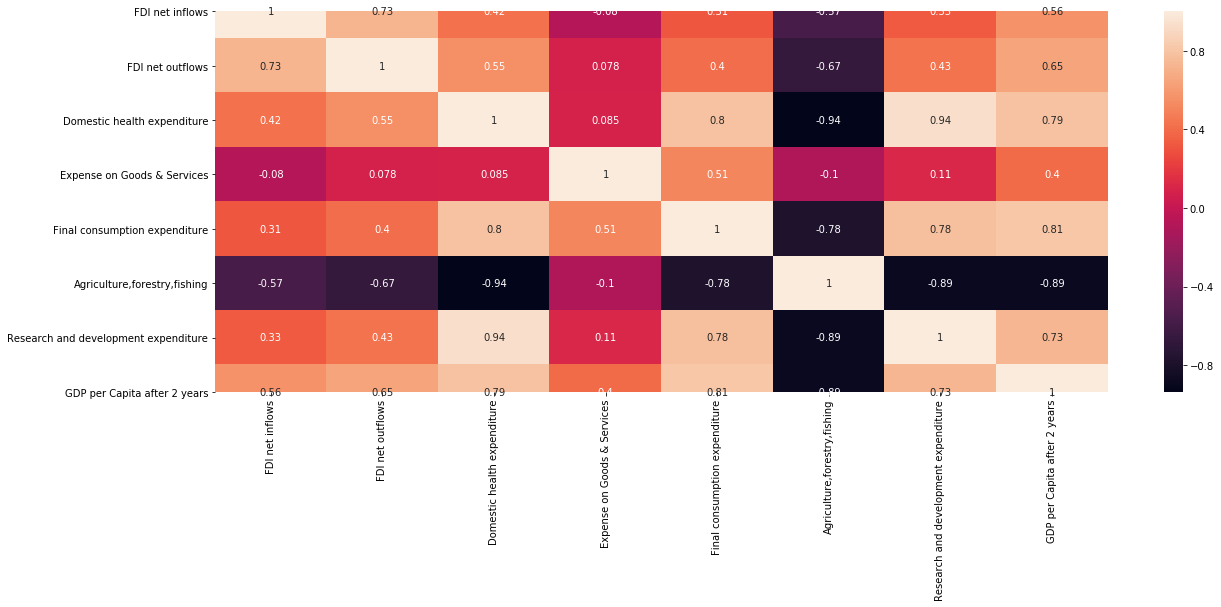

In [14]:
import seaborn as sns
#plotting the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(df_joined.corr(), annot=True)

In [15]:
df_joined

,date,Country code,FDI net inflows,FDI net outflows,Domestic health expenditure,Expense on Goods & Services,Final consumption expenditure,"Agriculture,forestry,fishing",Research and development expenditure,GDP per Capita after 2 years
0,2015,ITA,0.331474,0.154661,0.786772,0.728031,0.809848,0.197942,0.995286,0.778218
1,2014,ITA,0.350474,0.171489,0.860569,0.725903,0.846037,0.151910,1.000000,0.741723
2,2013,ITA,0.386929,0.171216,0.855347,0.725677,0.922600,0.252157,0.910462,0.723199
3,2012,ITA,0.117645,0.056343,0.861736,0.710774,0.976687,0.133389,0.817173,0.861970
4,2011,ITA,0.561910,0.414627,0.852033,0.652038,0.953012,0.073727,0.662502,0.862798
5,2010,ITA,0.254785,0.262385,0.996942,0.685768,1.000000,0.000000,0.696133,0.849771
6,2009,ITA,0.341311,0.151138,1.000000,0.755019,0.977361,0.018600,0.691444,0.942812
7,2008,ITA,0.000000,0.518016,0.751347,0.579820,0.688890,0.067713,0.545491,0.874622
8,2007,ITA,1.000000,1.000000,0.537810,0.534571,0.567206,0.082513,0.467003,0.902943
9,2006,ITA,0.982563,0.555838,0.703422,0.556728,0.671874,0.116368,0.351082,1.000000


### Using OLS for finding the p value and t statistics 

In [16]:

import statsmodels.api as sm
import statsmodels.formula.api as smf
model = sm.OLS(df_joined['GDP per Capita after 2 years'], df_joined[['FDI net inflows','FDI net outflows','Domestic health expenditure','Expense on Goods & Services', 'Final consumption expenditure','Agriculture,forestry,fishing','Research and development expenditure']]).fit()

# Print out the statistic
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     GDP per Capita after 2 years   R-squared (uncentered):                   0.954
Model:                                      OLS   Adj. R-squared (uncentered):              0.946
Method:                           Least Squares   F-statistic:                              115.7
Date:                          Thu, 23 Apr 2020   Prob (F-statistic):                    4.59e-24
Time:                                  00:08:45   Log-Likelihood:                          32.785
No. Observations:                            46   AIC:                                     -51.57
Df Residuals:                                39   BIC:                                     -38.77
Df Model:                                     7                                                  
Covariance Type:                      nonrobust                                                  
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
FDI net inflows                          0.4373      0.140      3.126      0.003       0.154       0.720
FDI net outflows                         0.1318      0.178      0.738      0.465      -0.229       0.493
Domestic health expenditure              0.2933      0.205      1.433      0.160      -0.121       0.707
Expense on Goods & Services              0.3171      0.102      3.100      0.004       0.110       0.524
Final consumption expenditure            0.2780      0.188      1.480      0.147      -0.102       0.658
Agriculture,forestry,fishing            -0.1238      0.057     -2.170      0.036      -0.239      -0.008
Research and development expenditure    -0.0356      0.189     -0.189      0.851      -0.418       0.347
==============================================================================
Omnibus:                        1.419   Durbin-Watson:                   0.847
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                1.297
Skew:                          -0.392   Prob(JB):                        0.523
Kurtosis:                       2.753   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### For any modelling task, the hypothesis is that there is some correlation between the features and the target.

#### The null hypothesis : there is no correlation between the features and the target.

Considering the significance value of 0.05.

1. The **FDI net inflows** has the p-value 0.003, which is less and this provides greater evidence against the null hypothesis and      it is a significant feature.
2.  The **FDI net outflows** has the p-value 0.465, which is greater and this provides less evidence against the null hypothesis and it    is not a significant feature.
2. The **Domestic health expenditure** has the p-value 	0.160, which is less and this provides greater evidence against the null hypothesis and      it is a significant feature.
3. The **Expense on Goods & Services** has the p-value 0.004, which is greater and this provides less evidence against the null hypothesis and it    is not a significant feature.
4. The **Final consumption expenditure** has the p-value 0.147, which is less and this provides greater evidence against the null hypothesis and      it is a significant feature.
5. The **Agriculture,forestry,fishing** has the p-value 0.036,which is greater and this provides less evidence against the null hypothesis and it    is not a significant feature.
6. The **Research and development expenditure** has the p-value 0.851, which is less and this provides greater evidence against the null hypothesis and      it is a significant feature.

## Modelling the data using Linear regression

### Train, test and validation split

Data is split into 3 parts 

Taining data set = 80.75%

Validation data set = 14.25%

Test data set = 5%

In [17]:
from sklearn.model_selection import  train_test_split

X = df_joined[['FDI net inflows','Domestic health expenditure','Final consumption expenditure','Research and development expenditure']]

y = df_joined['GDP per Capita after 2 years']

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.05, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

### Linear Regression

In [18]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_train)

In [20]:
#training Data

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))

Coefficients: 
 [0.5163308  0.13145221 0.66998857 0.0010682 ]
Mean squared error: 0.02
Coefficient of determination: 0.82


In [21]:
# Make predictions using the testing set
y_pred = regr.predict(X_val)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))

Coefficients: 
 [0.5163308  0.13145221 0.66998857 0.0010682 ]
Mean squared error: 0.03
Coefficient of determination: 0.67


In [22]:
y_pred

array([0.47818944, 0.43607507, 0.37506775, 0.65088711, 0.10087462,
       0.52081742, 0.28200909])

In [23]:
# Get R2 measure (indicator of accuracy 1 is perfect 0 is horrible)
#regr.score(X_test, y_test)
train_score=regr.score(X_train, y_train)
test_score=regr.score(X_test, y_test)


print("linear regression train score:", train_score)
print("linear regression test score:", test_score)

linear regression train score: 0.8167554810284061
linear regression test score: 0.5126405383847316


Text(0, 0.5, 'Predictions')

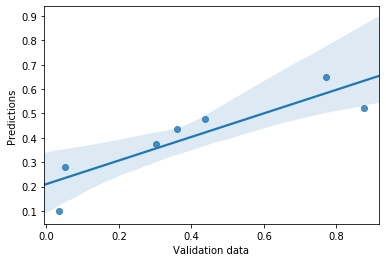

In [24]:
## The line / model
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(y_val,y_pred)
plt.xlabel('Validation data')
plt.ylabel('Predictions')

## Random forest

#### Train,test and validation split

Data is split into 3 parts 

Training data set = 80.75%

Validation data set = 14.25%

Test data set = 5%

In [26]:
from sklearn.model_selection import  train_test_split

X = df_joined[['FDI net inflows','FDI net outflows','Domestic health expenditure','Final consumption expenditure','Agriculture,forestry,fishing','Research and development expenditure']]

y = df_joined['GDP per Capita after 2 years']

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.05, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [27]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

random_model = RandomForestRegressor(n_estimators =100,
 min_samples_split = 10,
 min_samples_leaf = 15,
 max_features= 'auto',
 max_depth = 20,
 bootstrap = True)
random_model.fit(X_train, y_train)
print('Training score',r2_score(y_train, random_model.predict(X_train)))

Training score -0.0011545109371302598


In [28]:
print('R2 score for training data' ,r2_score(y_train, random_model.predict(X_train)))
print('R2 score for test data',r2_score(y_test, random_model.predict(X_test)))

      
print('Root mean square error score on training set',np.sqrt(mean_squared_error(y_train,random_model.predict(X_train))))
print('Root mean square error score on test set',np.sqrt(mean_squared_error(y_test,random_model.predict(X_test))))


R2 score for training data -0.0011545109371302598
R2 score for test data -0.33885496337054
Root mean square error score on training set 0.3027072815594128
Root mean square error score on test set 0.3503153811905881


### The training and test score is quite bad without tuning the hyperparameters

### So we use Grid search for the tunning the hyper parameter


Which hyperparameters are important? 
1. n_estimators = number of trees in the foreset
2. max_features = max number of features considered for splitting a node
3. max_depth = max number of levels in each decision tree
4. min_samples_split = min number of data points placed in a node before the node is split
5. min_samples_leaf = min number of data points allowed in a leaf node
6. bootstrap = method for sampling data points (with or without replacement)

Used the Grid Search to tune the **Hyper Parameter** and found the best possible hyperparameter for the Random Hyperparameter Grid.

After hyperparameter tunning, the model did better performance.

In [29]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [30]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   34.0s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [31]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [32]:
from sklearn.ensemble import RandomForestRegressor


random_model = RandomForestRegressor(n_estimators =200,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features= 'sqrt',
 max_depth = 50,
 bootstrap = True)
random_model.fit(X_train, y_train)
print('Training score is',r2_score(y_train, random_model.predict(X_train)))

Training score is 0.9757422008848236


In [33]:
print('Testing score is ',r2_score(y_test, random_model.predict(X_test)))

rmse = np.sqrt(mean_squared_error(y_test,random_model.predict(X_test)))
print('Root mean square error is',rmse)

Testing score is  0.9101695795133311
Root mean square error is 0.09074112430727493


In [59]:
random_model.predict(X_test)

array([0.25994517, 0.09849299, 0.79738325])

### Artifical Neural Network

##### Artificial Neural Networks (ANN) are multi-layer fully-connected neural nets.


#### Train test split

In [34]:
#Train test split
train_dataset = df_joined.sample(frac=0.8,random_state=0)
test_dataset = df_joined.drop(train_dataset.index)

#### Performing Exploratory Data Analysis

In [35]:
train_dataset = train_dataset.drop('Country code',axis =1)
train_dataset = train_dataset.drop('date',axis =1)
test_dataset = test_dataset.drop('Country code',axis =1)
test_dataset = test_dataset.drop('date',axis =1)

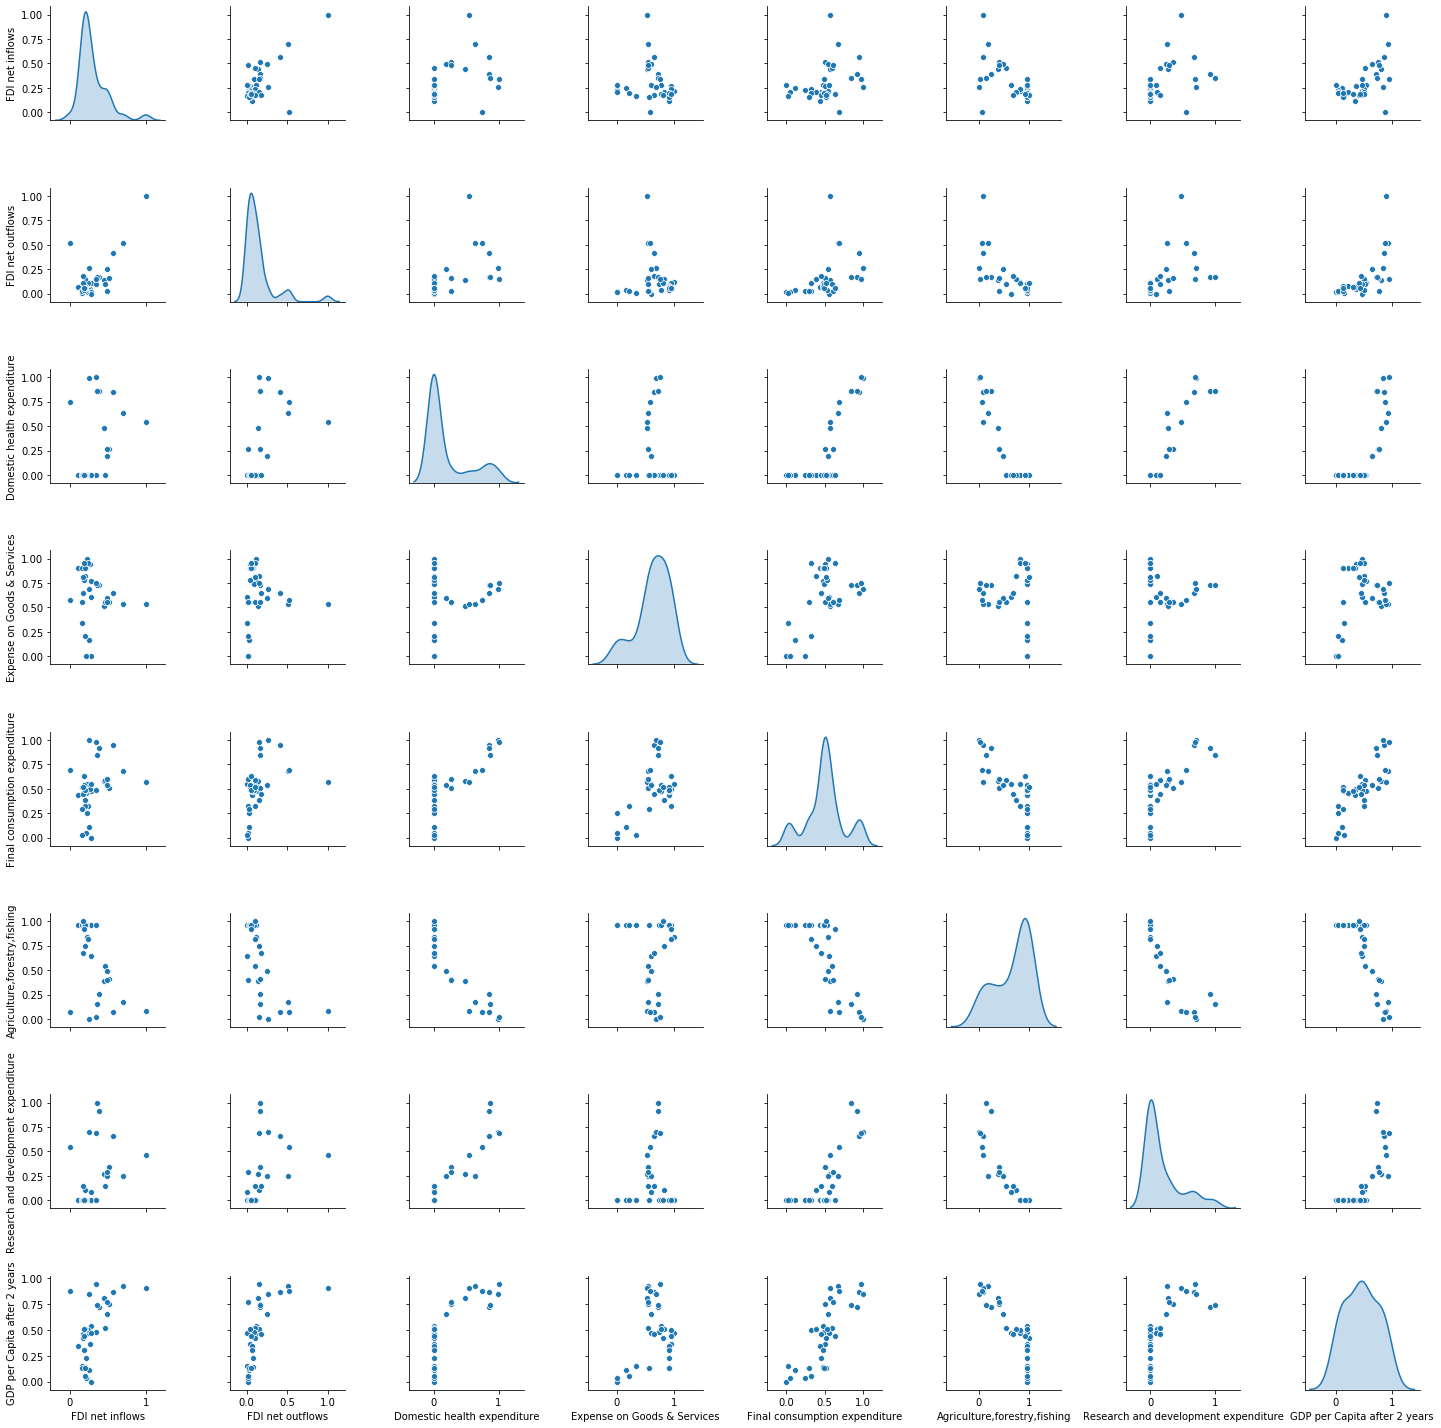

In [36]:
#Ploting pairwise relationships in the dataset 
sns.pairplot(train_dataset, diag_kind="kde")

In [37]:
#computing a summary of statistics 
train_stats = train_dataset.describe()

#Droping the target column
train_stats.pop("GDP per Capita after 2 years")

#Transpose of the dataset
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
FDI net inflows,37.0,0.299925,0.185274,0.0,0.187019,0.239115,0.350474,1.0
FDI net outflows,37.0,0.146766,0.192465,0.0,0.037711,0.093431,0.163540,1.0
Domestic health expenditure,37.0,0.208303,0.344174,0.0,0.000000,0.000000,0.270237,1.0
Expense on Goods & Services,37.0,0.640706,0.278295,0.0,0.551161,0.685768,0.907989,1.0
Final consumption expenditure,37.0,0.507494,0.242799,0.0,0.434600,0.509919,0.593326,1.0
"Agriculture,forestry,fishing",37.0,0.676396,0.355946,0.0,0.397933,0.917141,0.961180,1.0
Research and development expenditure,37.0,0.185275,0.285461,0.0,0.000000,0.000000,0.265320,1.0


In [38]:
#Droping the target lable in the train and test dataset
train_labels = train_dataset.pop('GDP per Capita after 2 years')
test_labels = test_dataset.pop('GDP per Capita after 2 years')

In [39]:
#Function for normalising the dataset
def norm(a):
    return (a - train_stats['mean']) / train_stats['std']

In [40]:
#Normalization of train and test dataset
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [42]:
#Building the model with one input, hidden and output layer.

def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

    #using optimizer perform backpropagation and 0.001 is the learning rate
    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse']) #update weights
    return model

In [43]:
model = build_model()

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [45]:
example_batch = normed_train_data[:9]
example_result = model.predict(example_batch)
example_result

array([[-0.25936973],
       [-0.06310489],
       [-0.24259803],
       [-0.05663612],
       [-0.45610175],
       [-0.33852097],
       [-0.46724474],
       [-0.257018  ],
       [-0.314226  ]], dtype=float32)

In [46]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [47]:
#Earlystopping to avoid overfitting
earlystopper = EarlyStopping(patience=3, verbose=1)

filepath = "model.h5"

#save the model in model.h5
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min')

 

callbacks_list = [earlystopper, checkpoint]

In [48]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=1,
  callbacks=callbacks_list)

Train on 29 samples, validate on 8 samples
Epoch 1/1000

Epoch 00001: val_loss improved from inf to 0.38350, saving model to model.h5
29/29 [==============================] - 0s 4ms/sample - loss: 0.9910 - mae: 0.9277 - mse: 0.9910 - val_loss: 0.3835 - val_mae: 0.5991 - val_mse: 0.3835
Epoch 2/1000

Epoch 00002: val_loss improved from 0.38350 to 0.23824, saving model to model.h5
29/29 [==============================] - 0s 619us/sample - loss: 0.5154 - mae: 0.6671 - mse: 0.5154 - val_loss: 0.2382 - val_mae: 0.4634 - val_mse: 0.2382
Epoch 3/1000

Epoch 00003: val_loss improved from 0.23824 to 0.16060, saving model to model.h5
29/29 [==============================] - 0s 481us/sample - loss: 0.3104 - mae: 0.5109 - mse: 0.3104 - val_loss: 0.1606 - val_mae: 0.3686 - val_mse: 0.1606
Epoch 4/1000

Epoch 00004: val_loss improved from 0.16060 to 0.11435, saving model to model.h5
29/29 [==============================] - 0s 481us/sample - loss: 0.1994 - mae: 0.3988 - mse: 0.1994 - val_loss: 0.1143

Epoch 34/1000

Epoch 00034: val_loss improved from 0.02188 to 0.02173, saving model to model.h5
29/29 [==============================] - 0s 550us/sample - loss: 0.0114 - mae: 0.0825 - mse: 0.0114 - val_loss: 0.0217 - val_mae: 0.1216 - val_mse: 0.0217
Epoch 35/1000

Epoch 00035: val_loss improved from 0.02173 to 0.02125, saving model to model.h5
29/29 [==============================] - 0s 481us/sample - loss: 0.0107 - mae: 0.0801 - mse: 0.0107 - val_loss: 0.0213 - val_mae: 0.1196 - val_mse: 0.0213
Epoch 36/1000

Epoch 00036: val_loss improved from 0.02125 to 0.02120, saving model to model.h5
29/29 [==============================] - 0s 516us/sample - loss: 0.0099 - mae: 0.0778 - mse: 0.0099 - val_loss: 0.0212 - val_mae: 0.1197 - val_mse: 0.0212
Epoch 37/1000

Epoch 00037: val_loss improved from 0.02120 to 0.02100, saving model to model.h5
29/29 [==============================] - 0s 516us/sample - loss: 0.0093 - mae: 0.0753 - mse: 0.0093 - val_loss: 0.0210 - val_mae: 0.1186 - val_mse: 0.0

In [49]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
47,0.008627,0.079658,0.008627,0.038376,0.169473,0.038376,47
48,0.011886,0.095879,0.011886,0.013635,0.093765,0.013635,48
49,0.011523,0.093311,0.011523,0.032296,0.155461,0.032296,49
50,0.009095,0.083332,0.009095,0.015073,0.097708,0.015073,50
51,0.006538,0.070347,0.006538,0.025916,0.135462,0.025916,51


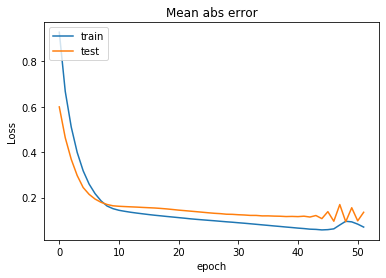

In [50]:
# summarize history of mean absolute error
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Mean abs error')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


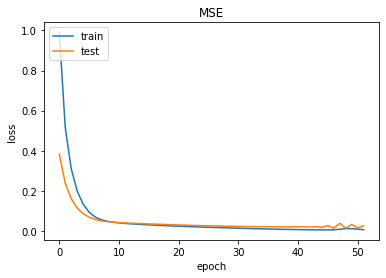

In [51]:
# summarize history for mean square error
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('MSE')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [52]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop])

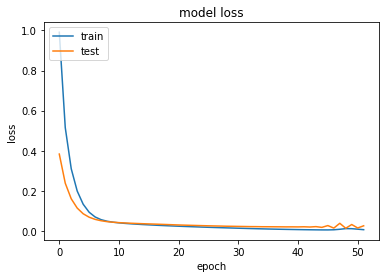

In [53]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f}".format(mae))

9/9 - 0s - loss: 0.0229 - mae: 0.1221 - mse: 0.0229
Testing set Mean Abs Error:  0.12


In [55]:
print("Accuarcy is",(1-loss))

Accuarcy is 0.9771037232130766


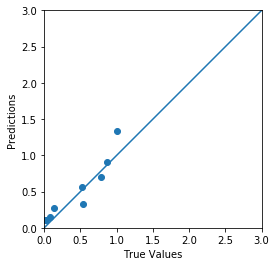

In [56]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 3]
plt.xlim(lims)
plt.ylim(lims)
#_ = plt.plot(lims, lims)
_ = plt.plot([-100, 100], [-100, 100])

In [57]:
test_predictions

array([0.70772916, 0.9088595 , 1.3302995 , 0.5579339 , 0.32288525,
       0.27855295, 0.14802364, 0.108867  , 0.10675432], dtype=float32)

In [58]:
print ("linear regression test score:", test_score)
print('Random forest testing score is ',r2_score(y_test, random_model.predict(X_test)))
print("ANN testing score is", (1 - loss))

linear regression test score: 0.5126405383847316
Random forest testing score is  0.9101695795133311
ANN testing score is 0.9771037232130766


## Conclusion

After our analysis, we have come to a conclusion that ***FDI net inflows, Domestic health expenditure, Final consumption expenditure and Research and development expenditure*** are important factors impacting GDP per capita for ***Italy***